# Modular CASA Demo

Original Author: rraba@nrao.edu



## Description

This notebook shows how to install the modular CASA 6 packages with some basic orientation:

- locate the casadata folder
- list the available tasks
- find and print the log file
- run a simple tclean command
- view the output images with Astropy
- view the output images with CARTA

WARNING: when running this Notebook in Google Colab, CASA pip-wheel occasionally experience incompatibilities with recently upgraded Colab environments. Please check the Known Issues Section in CASA Docs when experiencing installation problems, or contact the CASA team at casa-feedback_*at*_nrao.edu


## Installation

First the system must be configured with the appropriate pre-requisite libraries to create a virtual display necessary for later plots/images.

In [ ]:
# prerequisite system setup
import os
os.system('apt-get install xvfb')
os.system('pip install pyvirtualdisplay')

from pyvirtualdisplay import Display
display = Display(visible=0,size=(1024,768))
display.start( )

print('completed system setup')

completed system setup


Then we can choose from the available CASA packages to install: ```casatools, casatasks, casaplotms, casaviewer, almatasks, casampi, casashell, casadata, casampi, casaplotserver```

The pip installer generally handles dependencies automatically (for example casatasks needs casatools), however casadata is the exception that must be explicitly installed and updated by the user.

In [ ]:
import os
print("installing casa packages...\n")
os.system("pip install casatasks==6.3.0.48")
os.system("pip install casaviewer==1.2.14")
os.system("pip install casadata")

print("downloading MeasurementSet from CASAguide First Look at Imaging...\n")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

print("make a config file for Google Colab...\n")
!mkdir ~/.casa
!echo "home     = '/content/'" > ~/.casa/config.py
!echo "datapath = ['`find / -type d -name casadata`']" >> ~/.casa/config.py
!more ~/.casa/config.py

installing casa packages...

downloading MeasurementSet from CASAguide First Look at Imaging...

make a config file for Google Colab...

home     = '/content/'
datapath = ['/usr/local/lib/python3.7/dist-packages/casadata']


## Getting Started

We can inspect the contents of a package, or better yet, read its corresponding API section in [CASAdocs](https://casadocs.readthedocs.io/en/stable/api.html)

In [ ]:
import casatasks
casatasks.__all__

['casalog',
 'version',
 'version_string',
 'imhead',
 'immoments',
 'imhistory',
 'applycal',
 'bandpass',
 'blcal',
 'calstat',
 'concat',
 'split',
 'listobs',
 'flagdata',
 'flagcmd',
 'setjy',
 'cvel',
 'cvel2',
 'importuvfits',
 'importfits',
 'exportfits',
 'exportuvfits',
 'partition',
 'listpartition',
 'flagmanager',
 'mstransform',
 'tclean',
 'immath',
 'vishead',
 'uvsub',
 'spxfit',
 'splattotable',
 'specsmooth',
 'specflux',
 'smoothcal',
 'specfit',
 'imstat',
 'slsearch',
 'delmod',
 'imsubimage',
 'accor',
 'asdmsummary',
 'clearcal',
 'conjugatevis',
 'exportasdm',
 'importasdm',
 'clearstat',
 'fixplanets',
 'fixvis',
 'phaseshift',
 'fluxscale',
 'ft',
 'gaincal',
 'gencal',
 'uvcontsub3',
 'testconcat',
 'apparentsens',
 'hanningsmooth',
 'imcollapse',
 'imcontsub',
 'imdev',
 'imfit',
 'impbcor',
 'importasap',
 'importatca',
 'importfitsidi',
 'importgmrt',
 'importnro',
 'importvla',
 'impv',
 'imrebin',
 'imreframe',
 'imregrid',
 'imsmooth',
 'imtrans',
 'im

We execute tasks just like normal Python functions. Many times they will write information to the log or a specified output file, which we then must display.

In [ ]:
from casatasks import listobs

rc = listobs(vis='sis14_twhya_calibrated_flagged.ms', listfile='obslist.txt', verbose=False, overwrite=True)
!cat obslist.txt

           MeasurementSet Name:  /content/sis14_twhya_calibrated_flagged.ms      MS Version 2
   Observer: cqi     Project: uid://A002/X327408/X6f  
Observation: ALMA(26 antennas)
Data records: 80563       Total elapsed time = 5647.68 seconds
   Observed from   19-Nov-2012/07:36:57.0   to   19-Nov-2012/09:11:04.7 (UTC)

Fields: 5
  ID   Code Name                RA               Decl           Epoch   SrcId      nRows
  0    none J0522-364           05:22:57.984648 -36.27.30.85128 J2000   0           4200
  2    none Ceres               06:10:15.950590 +23.22.06.90668 J2000   2           3800
  3    none J1037-295           10:37:16.079736 -29.34.02.81316 J2000   3          16000
  5    none TW Hya              11:01:51.796000 -34.42.17.36600 J2000   4          53161
  6    none 3c279               12:56:11.166576 -05.47.21.52464 J2000   5           3402
Spectral Windows:  (1 unique spectral windows and 1 unique polarization setups)
  SpwID  Name                           #Chans   Frame

Another example, lets do channel averaging with MSTransform. Here we need to make sure we've deleted the previous output file if/when running multiple times.  Since this task doesn't return anything, we can look at the end of the log file to see what happened.

In [ ]:
from casatasks import mstransform

os.system("rm -fr chanavg.ms")
mstransform(vis='sis14_twhya_calibrated_flagged.ms', outputvis='chanavg.ms',
            datacolumn='DATA', chanaverage=True, chanbin=3)
!tail casa-202*.log

2021-10-14 17:43:24	INFO	MSTransformManager::parseMsSpecParams	Tile shape is [0]
2021-10-14 17:43:24	INFO	MSTransformManager::parseChanAvgParams	Channel average is activated
2021-10-14 17:43:24	INFO	MSTransformManager::parseChanAvgParams	Channel bin is [3]
2021-10-14 17:43:24	INFO	MSTransformManager::colCheckInfo	Adding DATA column to output MS from input DATA column
2021-10-14 17:43:24	INFO	MSTransformManager::open	Select data
2021-10-14 17:43:24	INFO	MSTransformManager::createOutputMSStructure	Create output MS structure
2021-10-14 17:43:24	INFO	ParallelDataHelper::::casa	Apply the transformations
2021-10-14 17:43:29	INFO	mstransform::::casa	Task mstransform complete. Start time: 2021-10-14 17:43:23.610120 End time: 2021-10-14 17:43:29.323998
2021-10-14 17:43:29	INFO	mstransform::::casa	##### End Task: mstransform          #####
2021-10-14 17:43:29	INFO	mstransform::::casa	##########################################


## Running tclean

Tclean works in non-interactive mode only (interactive=False).

In [ ]:
from casatasks import tclean

print("running tclean, may take a bit...")

tclean(vis='sis14_twhya_calibrated_flagged.ms', imagename='first_image',
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000,
       interactive=False, savemodel='modelcolumn')

print("complete")

running tclean, may take a bit...
complete


## View Images with Viewer

We can use the casaviewer package to view images, but we need to start the viewer manually as a separate process

In [ ]:
import subprocess as sp

sp.Popen('/usr/local/lib/python3.7/dist-packages/casaviewer/__bin__/casaviewer-x86_64.AppImage',
         shell=True, preexec_fn=os.setsid, stdin=sp.PIPE, stdout=sp.PIPE, stderr=sp.STDOUT)

Now call imview and render the image to an output file where it can then be displayed

(0) waiting for viewer process...
(1) waiting for viewer process...
(2) waiting for viewer process...
(3) waiting for viewer process...
(4) waiting for viewer process...
	...{'id': 'casaviewer:b1fc', 'priority': 0, 'types': array(['shutdown', 'image-view', 'interactive-clean'], dtype='<U18'), 'uri': '0.0.0.0:44403'}


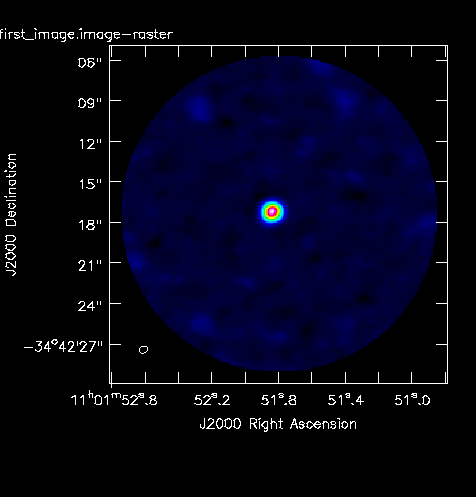

In [ ]:
from casaviewer import imview
from IPython.display import Image

imview('first_image.image', out='test.png')

Image(filename="test.png")

## View Images with Astropy

We can use the image tool from casatools to load raw image data, then feed it to another Python package like Astropy and display it using Matplotlib.

Astropy is already installed in Google Colaboratory, but if running this on some other Jupyter Hub system, you'll probably need to ```pip install astropy```.  Also note that we didn't explicitly install casatools either, but it was automatically installed as a dependency of casatasks.

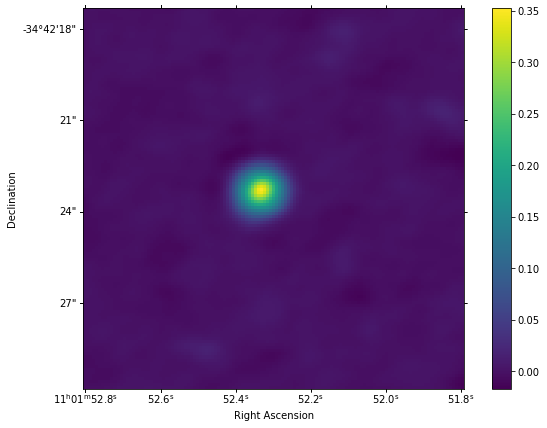

In [ ]:
from casatools import image as IA
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

ia = IA()
ia.open('first_image.image')
pix = ia.getchunk()[:,:,0,0]
csys = ia.coordsys()
ia.close()

rad_to_deg =  180/np.pi
w = WCS(naxis=2)
w.wcs.crpix = csys.referencepixel()['numeric'][0:2]
w.wcs.cdelt = csys.increment()['numeric'][0:2]*rad_to_deg
w.wcs.crval = csys.referencevalue()['numeric'][0:2]*rad_to_deg
w.wcs.ctype = ['RA---SIN', 'DEC--SIN']

plt.subplots(1,1, figsize=(10,7))
ax = plt.subplot(1, 1, 1, projection=w)
p1 = int(pix.shape[0]*0.25)
p2 = int(pix.shape[0]*0.75)

im = ax.imshow(pix[p1:p2,p1:p2].transpose(), origin='lower',  cmap=plt.cm.viridis)
plt.colorbar(im, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')